[*********************100%***********************]  1 of 1 completed


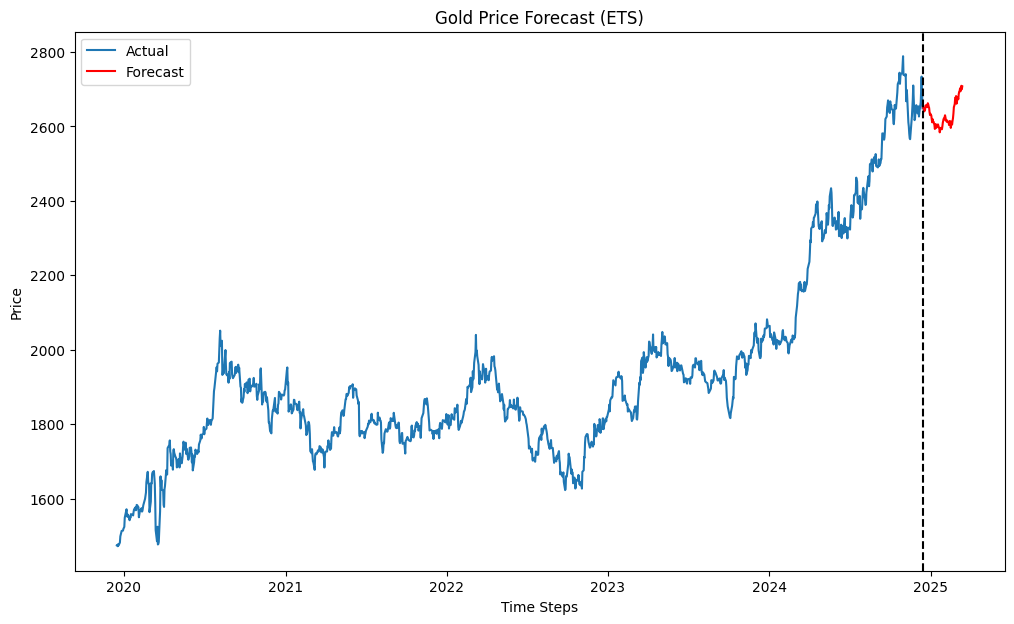

In [ ]:
# prompt: how to visualizing starting from zero

import yfinance as yf
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from joblib import dump, load

# Ensure the index starts from 0
df = yf.download('GC=F', period='5y')
df = df[["Close"]]
df.index = pd.to_datetime(df.index)

# Reset the index to create a numerical index starting from 0
df = df.reset_index()

# Fit the ETS model
model = ExponentialSmoothing(df["Close"], trend="add", seasonal="add", seasonal_periods=90)
model_fit = model.fit()

# Make predictions
forecast_steps = 90
predictions = model_fit.forecast(forecast_steps)

# Create a new DataFrame for predictions with the correct index
predictions_df = pd.DataFrame({'Close': predictions})
predictions_df['Date'] = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_steps)
predictions_df = predictions_df.set_index('Date')


#For visualization, aligning the x-axis
plt.figure(figsize=(12, 7))

# Plot actual data with numerical index starting from 0
plt.plot(df['Date'], df["Close"], label="Actual")

# Plot predictions with a shifted numerical index
plt.plot(predictions_df.index, predictions, label="Forecast", color="red")
plt.axvline(x=df['Date'].iloc[-1], color='black', linestyle='--')
plt.legend()
plt.title(f"Gold Price Forecast (ETS)")
plt.xlabel("Time Steps")  # Changed to "Time Steps"
plt.ylabel("Price")
plt.show()

In [ ]:
df

Price,Date,Close
Ticker,,GC=F
0,2019-12-16,1475.000000
1,2019-12-17,1474.599976
2,2019-12-18,1472.599976
3,2019-12-19,1478.199951
4,2019-12-20,1474.699951
...,...,...
1253,2024-12-09,2664.899902
1254,2024-12-10,2697.600098
1255,2024-12-11,2733.800049


In [ ]:
print(predictions_df)

                  Close
Date                   
2024-12-14  2653.204087
2024-12-15  2649.445485
2024-12-16  2646.217001
2024-12-17  2640.399843
2024-12-18  2642.577805
...                 ...
2025-03-09  2694.336319
2025-03-10  2703.946731
2025-03-11  2709.167431
2025-03-12  2699.939121
2025-03-13  2707.282922

[90 rows x 1 columns]


In [ ]:
from joblib import dump, load
# Save the model to a file
dump(model_fit, 'ets_model.joblib')

['ets_model.joblib']

In [ ]:
load_model = load('ets_model.joblib')

In [ ]:
pred = load_model.forecast(90)
print(pred)

1258    2653.204087
1259    2649.445485
1260    2646.217001
1261    2640.399843
1262    2642.577805
           ...     
1343    2694.336319
1344    2703.946731
1345    2709.167431
1346    2699.939121
1347    2707.282922
Length: 90, dtype: float64


In [ ]:
predictions = pd.DataFrame({'Close': pred})
predictions['Date'] = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_steps)
predictions = predictions.set_index('Date')
print(predictions[:'2025-03-12'])

                  Close
Date                   
2024-12-14  2653.204087
2024-12-15  2649.445485
2024-12-16  2646.217001
2024-12-17  2640.399843
2024-12-18  2642.577805
...                 ...
2025-03-08  2701.986370
2025-03-09  2694.336319
2025-03-10  2703.946731
2025-03-11  2709.167431
2025-03-12  2699.939121

[89 rows x 1 columns]
